<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [4]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Load the dataset into a dataframe.


In [75]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

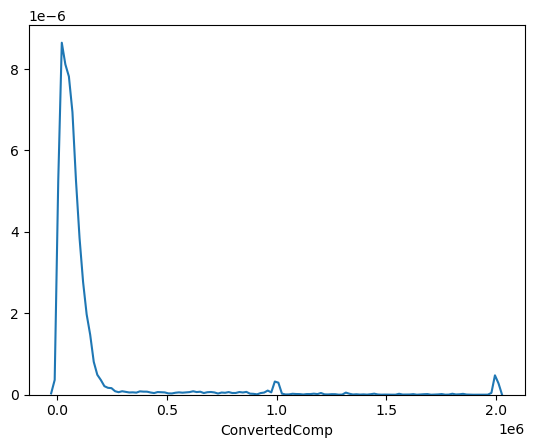

In [6]:
sns.distplot (df['ConvertedComp'], hist = False)


Plot the histogram for the column `ConvertedComp`.


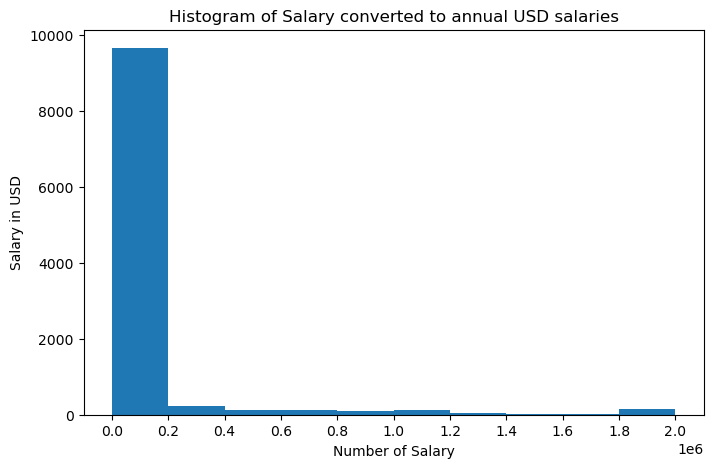

In [8]:
count, bin_edges = np.histogram(df['ConvertedComp'].dropna())

df['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Salary converted to annual USD salaries')  
plt.ylabel('Salary in USD')  
plt.xlabel('Number of Salary')  

plt.show()

What is the median of the column `ConvertedComp`?


In [78]:
# your code goes here #median= 57745
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
#10480
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


## **Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
woman=df.loc[df['Gender']=='Woman',['ConvertedComp']]
woman.median()

ConvertedComp    57708.0
dtype: float64

Plot a histogram of the column `Age`.


## Outliers


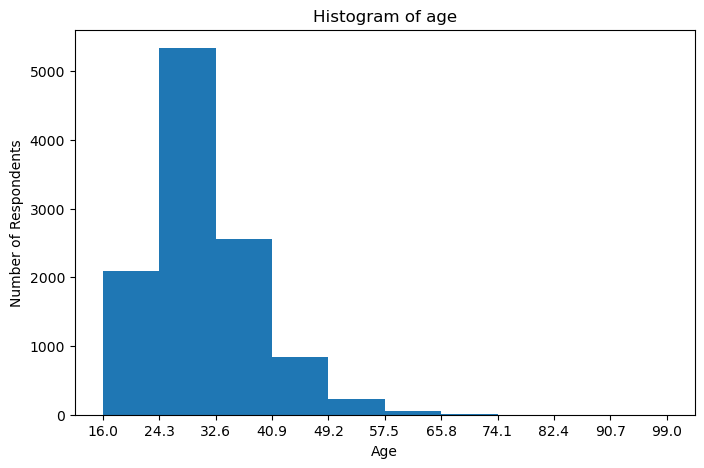

In [12]:
# your code goes here
count, bin_edges = np.histogram(df['Age'].dropna())

df['Age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of age')  
plt.xlabel('Age')  
plt.ylabel('Number of Respondents')  

plt.show()

In [13]:
df['Age'].median()

29.0

### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

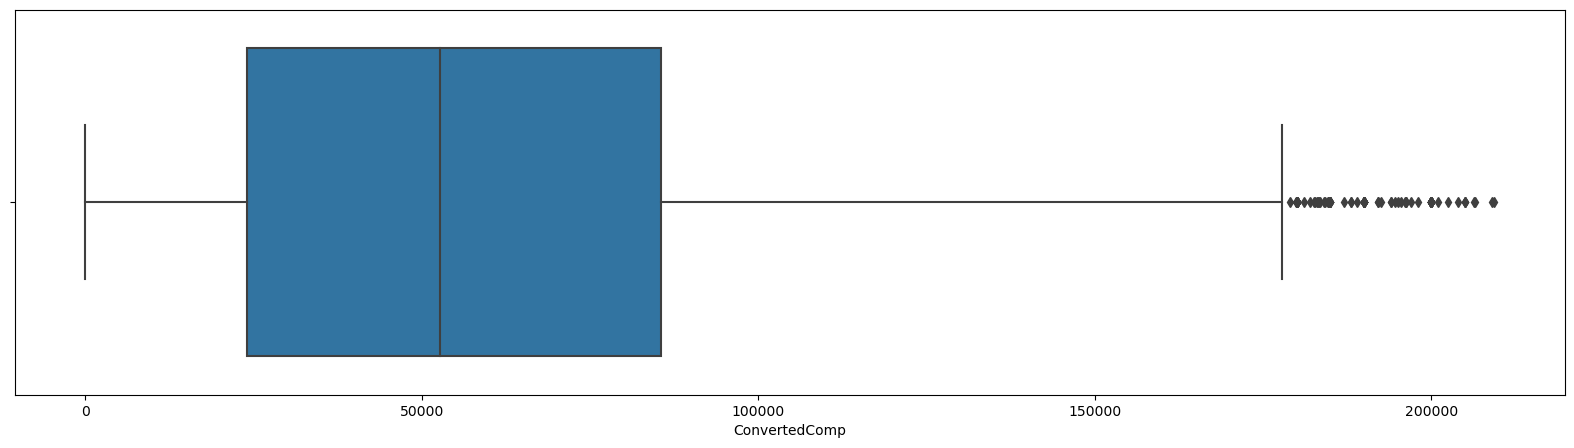

In [85]:
# your code goes here yes exist outliers
plt.figure(figsize=(20,5))
sns.boxplot(df['ConvertedComp'])


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [79]:
# your code goes here
q3, q1 = np.percentile(df['ConvertedComp'].dropna(), [75 ,25])
iqr=q3-q1
iqr


73132.0

Find out the upper and lower bounds.


In [80]:
# your code goes here
lowerBound= q1-(1.5*iqr)
upperBound=q3+(1.5*iqr)
print('lowerbound is:',lowerBound,' upperbound is: ',upperBound)


lowerbound is: -82830.0  upperbound is:  209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [81]:
# your code goes here 879 outliers
outlier=((df['ConvertedComp'] < (lowerBound)) | (df['ConvertedComp'] > (upperBound)))
outlier.sum()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [83]:
df[outlier] = np.nan #take all outliers and set to 0 
df['ConvertedComp'].dropna() #drop all values with na 
outlier=((df['ConvertedComp'] < (lowerBound)) | (df['ConvertedComp'] > (upperBound))) #check to see if theres are still outliers 
outlier.sum()
df['ConvertedComp'].median()
#df['ConvertedComp'].mean()

52704.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [88]:
 df.corr()['Age'] 

Respondent       0.003950
CompTotal        0.006371
ConvertedComp    0.401821
WorkWeekHrs      0.037452
CodeRevHrs      -0.017961
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
